## just having a look at the clustering measurements for testing 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import pickle as p
from pypower import PowerSpectrumMultipoles


In [10]:
path = '/global/cfs/cdirs/desicollab/users/alexpzfz/KP4/fiducial_cosmo/CubicBox/Pk/ELG/AbacusSummit_base_c003_SV3/los_x/'
filename = 'Pk_ELG_snap16_multigrid_nmesh512_sm10_f0.888_b1.20_recsym_Grid000_ph000.npy'
#filename = 'Pk_ELG_snap16_Grid000_ph003.npy'

#dat = np.load(path+filename, allow_pickle=True)

#d = dat[()] # weird way to read in the files .... 

# for i in d:
    
#     print(i)

# print('----------')
# print(d['name']) # just 'multipole' 
# print(d['modes'][0].shape) # k modes 
# print(d['edges'][0])#.shape) # k bin edges 
# print(d['power_direct_nonorm'][0].shape) # array of zeros ????????????????
# print(d['power_nonorm'][0].shape) # actually a power spectrum? 
# print(d['power_zero_nonorm']) # 3 random numbers that are complex (idk y)
# print(d['sep_direct']) # actually just 'None'
# print(d['nmodes'].shape) # dont know 
# print(d['wnorm']) # single number 
# print(d['shotnoise_nonorm']) # single number 
# print(d['corr_direct_nonorm']) # actually None 
# print(d['ells'])
# print(d['attrs'])

# plt.subplots_adjust(wspace=0.5, hspace=0.5, right=2.0, left=0.0, bottom=-.5)
# plt.scatter(d['modes'][0][3:], np.real(d['power_nonorm'][0][3:]))# * d['modes'][0][3:]**2))



poles = PowerSpectrumMultipoles.load(path+filename)
#print(poles.k)
print(poles.k)
#print(poles.log_info())
poles.slice(slice(0, 800))
poles.rebin(5) # rebinning by a factor of 5 

print(len(poles.k))

k, pkell = poles(ell=(0,2,4), return_k=True, complex=False)
print(k)
bools = np.logical_not(np.isnan(k))
k = k[bools]

pk0, pk2, pk4 = pkell

pk0 = pk0[bools]
pk2 = pk2[bools]
pk4 = pk4[bools]


#print(np.min(k), np.max(k), len(k))

#print(pkell2)
#print(k)


#print(k2)
#print(k2)
#print(abs(k2[1:] - k2[0:-1]))
#print(abs(k[1:] - k[0:-1]))

# print(dir(poles))
# print(poles.edges[0].shape) # just 'multipole' 
# print(poles.modes[0].shape) 
# print(poles.k.shape)
# print(poles.ells)
# print(poles(ell=(0,2,4), return_k=True, complex=False))

[0.                nan        nan 0.00318761 0.00450799 0.00552116
 0.00637522 0.00746791 0.00898627 0.00945089 0.01032614 0.0117084
 0.01275043 0.01343696 0.01460548 0.0157855  0.01634325 0.01730552
 0.01855801 0.01947548 0.02050282 0.0214222  0.0225465  0.02343352
 0.02450566 0.02552321 0.02643806 0.02753765 0.02855974 0.02949337
 0.03041212 0.03163187 0.03251282 0.0334762  0.03442156 0.03546606
 0.03650733 0.03750551 0.03860158 0.03949354 0.0405394  0.04154147
 0.04256997 0.04348285 0.04451316 0.04550969 0.04645134 0.04748947
 0.04850234 0.04954672 0.05045495 0.05147949 0.0524774  0.0534926
 0.05450195 0.05550392 0.0565009  0.05749467 0.05854069 0.05950468
 0.06049928 0.06148752 0.06252138 0.0635029  0.06448266 0.06550179
 0.06650337 0.067488   0.0684563  0.06947621 0.07047801 0.07149556
 0.07251208 0.07351309 0.07451872 0.07552536 0.07652626 0.07750493
 0.07850885 0.07950634 0.08047904 0.08147835 0.08250074 0.08350818
 0.0844978  0.08550922 0.08648982 0.08748942 0.08851309 0.089506

## looking at covariance matrices 

In [4]:
path = '/global/u2/c/crisjagq/HOD_tests/covariance_matrices/CovaPT/low_density/AnalyticCov_Gaussian_Pk_Abacus_CubicBox_hod_LNHOD.txt'
cov_input = pd.read_csv(path, comment="#", delim_whitespace=True, header=None).to_numpy()

print(cov_input.shape)

(480, 480)


## comparing to the other files we pickled for the ELG mocks 

In [70]:
loc = "/global/cfs/cdirs/desi/cosmosim/KP45/MC/Clustering/AbacusSummit/CubicBox/ELG/Pk/Pre/Cristhian/txt_rebinned/" # pre-recon 
loc2 = "/global/cfs/cdirs/desi/cosmosim/KP45/MC/Clustering/AbacusSummit/CubicBox/ELG/Pk/Post/Cristhian/recsym/txt_rebinned/" # post-recon
filename = "Pk_ELGlowDens_Abacus_c000_ph0" # pre-recon
filename2 = "Pk_ELGlowDens_recsym_Abacus_c000_ph0" # post-recon


mydata = open(loc2 + '/' + filename2 + "00" + '.txt', 'r') 
lines=mydata.readlines()
k  = []
P0 = []
P2 = []
P4 = []
for line in lines: # looping through lines in file to save k, monopole, quadrupole and hexadecapole 
    print(line)
    if line.startswith('#'):
        if line[4:17]=='galaxy_number':
            num_gal = float(line.split()[2])
            num_ran = num_gal * 20
            boxsize = 2000
            nbar_gal = num_gal/boxsize**3
            nbar_ran = num_ran/boxsize**3
            shot_noise_gal = 1/nbar_gal
            shot_noise_ran = 1/nbar_ran
            shot_noise = shot_noise_gal + shot_noise_ran
            print("num_gal:", num_gal, "nbar_gal:", nbar_gal, "Shot-Noise:", shot_noise)
    else:
        k.append(line.split()[1]) 
        P0.append(line.split()[3]) 
        P2.append(line.split()[4]) 
        P4.append(line.split()[5]) 
        mydata.close()
        
print(len(k))


# autocorr = True

# data_size1 = 23996301

# data_size2 = 23996301

# sum_data_weights1 = 23996301

# sum_data_weights2 = 23996301

# randoms_size1 = 0

# randoms_size2 = 0

# sum_randoms_weights1 = 0.000000000000e+00

# sum_randoms_weights2 = 0.000000000000e+00

# los_type = global

# los = [0.000000000000e+00 0.000000000000e+00 1.000000000000e+00]

# nmesh = [512 512 512]

# boxsize = [2.000000000000e+03 2.000000000000e+03 2.000000000000e+03]

# boxcenter = [1.000000001423e+03 1.000000001310e+03 1.000000001835e+03]

# resampler1 = tsc

# resampler2 = tsc

# interlacing1 = 2

# interlacing2 = 2

# shotnoise = 3.500539520654e+02

# wnorm = 7.197780771033e+04

# nmodes kmid               kavg               P0(k)              P1(k)              P2(k)               P3(k)              P4(k)

19       2.500000000000e-03 3.798113303144e-03 7.542145929318e+03 0.000000000000e+00 1.718171222892e+04  0.000000000000e+00 4.087224664767e+04

128      7.500000000000e-03 8.299341275452e-03 1.8104663

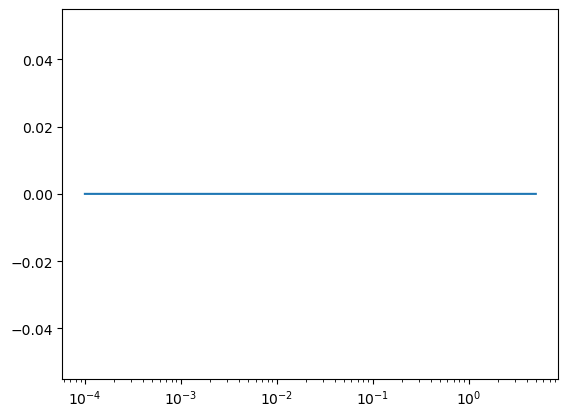

In [8]:
#import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#import pickle as p
#from pypower import PowerSpectrumMultipoles

pktemplate = np.loadtxt("DESI_Pk_template.dat").T
pktemplate2 = np.loadtxt("DESI_Pk_template_c003.dat").T

#plt.semilogx(pktemplate[0], (pktemplate[2]), label='cosmology 000')
#plt.semilogx(pktemplate2[0], (pktemplate2[2]), label='cosmology 003')

plt.semilogx(pktemplate[0], pktemplate[2] - pktemplate2[2])

plt.show()

In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import pickle as p
from pypower import PowerSpectrumMultipoles
import os 
# print(os.getcwd())

path = '/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/' 
path += 'DESI_SecondGen_sm10_elg_lop_ffa_gccomb_0.8_1.1_default_FKP_xi.pkl'

# open a file, where you stored the pickled data
with open(path, 'rb') as f:
    # dump information to that file
    dat = p.load(f)

for i in dat:
    if not 'mocks' in i:
        print(i, dat[i])
    else: 
        print(i, len(dat[i]))
        

# path = '/global/u1/a/abbew25/barryrepo/Barry/cosmodesi_KP4ELG_examplecode_make_picklefiles/' 
# path += 'desi_kp4_abacus_cubicbox_cv_xi_elg.pkl'

# # open a file, where you stored the pickled data
# with open(path, 'rb') as f:
#     # dump information to that file
#     dat = p.load(f)

# for i in dat:
#     print(i, dat[i])

n_data 1
pre-recon data None
pre-recon cov [[ 2.25922889e-06  8.40963767e-07  6.41622040e-07 ... -1.07267925e-08
  -1.58090439e-08 -1.92559366e-08]
 [ 8.40963767e-07  1.68459894e-06  6.75591341e-07 ... -9.33564271e-09
  -1.42860032e-08 -1.89140723e-08]
 [ 6.41622040e-07  6.75591341e-07  1.31335557e-06 ... -8.30580542e-09
  -1.24764851e-08 -1.64773611e-08]
 ...
 [-1.07267925e-08 -9.33564271e-09 -8.30580542e-09 ...  4.50017699e-07
   2.24961335e-07  1.87434166e-07]
 [-1.58090439e-08 -1.42860032e-08 -1.24764851e-08 ...  2.24961335e-07
   4.37305592e-07  2.19695433e-07]
 [-1.92559366e-08 -1.89140723e-08 -1.64773611e-08 ...  1.87434166e-07
   2.19695433e-07  4.26186926e-07]]
post-recon data None
post-recon cov [[ 2.32803196e-06  9.28345743e-07  7.04590182e-07 ...  3.17442145e-09
  -1.42601576e-09 -5.99696247e-09]
 [ 9.28345743e-07  1.69825542e-06  7.22489462e-07 ...  3.08552394e-09
  -1.45611462e-09 -5.38221763e-09]
 [ 7.04590182e-07  7.22489462e-07  1.30451919e-06 ...  3.65074665e-09
  -3.